<a href="https://colab.research.google.com/github/RaoMasood1/Handwritten_Digits_Classification/blob/main/Handwritten_Digits_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [6]:
#Load the Mnist Dataset in Keas
from tensorflow.keras.datasets import mnist

In [7]:
#from tensorflow.keras.datasets import fashion_mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
len(train_images)

60000

In [10]:
len(train_labels)

60000

In [11]:
len(test_images)

10000

In [12]:
len(test_labels)

10000

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
# 3d Tensor(Numpy array)
train_images.shape

(60000, 28, 28)

In [15]:
train_images[0].shape

(28, 28)

In [16]:
type(train_images)

numpy.ndarray

In [17]:
train_images.ndim

3

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
#Defining Network Structure
from keras import models
from keras import layers

In [21]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [23]:
num_perameters= (784*512)+512
print(num_perameters)
network.summary()

401920
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [26]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [27]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 8.1796e-04 - accuracy: 1.0000
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 5.7325e-04 - accuracy: 1.0000
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 4.2551e-04 - accuracy: 1.0000
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 3.7107e-04 - accuracy: 1.0000


In [32]:
network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9835


[0.06804723292589188, 0.9835000038146973]

In [33]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


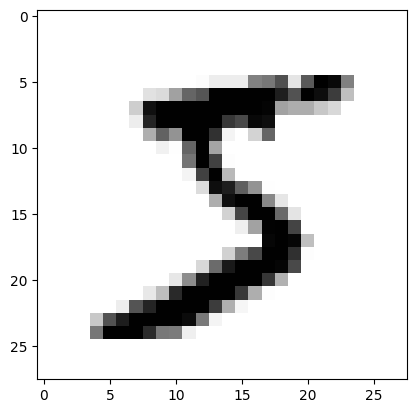

In [34]:
digit=train_images[0].reshape(28,28)*255

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()